<a href="https://colab.research.google.com/github/SBGitHub21/Portfolio/blob/master/Auto_Update_Predict_the_Spread_of_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Auto-Update Data

In [ ]:
!mkdir /content/.kaggle

In [ ]:

import json
token = {"username":"momoyumyum","key":"d6b294d76f4e019659450b0fb317b81c"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
%cd .kaggle
!ls

/content/.kaggle
kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -p /content

  0% 0.00/1.76M [00:00<?, ?B/s]
100% 1.76M/1.76M [00:00<00:00, 58.8MB/s]


In [ ]:
!pwd

/content/.kaggle


In [ ]:
!unzip /content/*.zip

Archive:  /content/novel-corona-virus-2019-dataset.zip
  inflating: COVID19_line_list_data.csv  
  inflating: COVID19_open_line_list.csv  
  inflating: covid_19_data.csv       
  inflating: time_series_covid_19_confirmed.csv  
  inflating: time_series_covid_19_confirmed_US.csv  
  inflating: time_series_covid_19_deaths.csv  
  inflating: time_series_covid_19_deaths_US.csv  
  inflating: time_series_covid_19_recovered.csv  


### Data Collection and Preprocessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/.kaggle/covid_19_data.csv',parse_dates=['Last Update'],index_col=0) 
#parsing according to the last update datetime column
#serial number as index
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
#renaming certain columns

In [ ]:
#used for Map later
df_confirmed = pd.read_csv("/content/.kaggle/time_series_covid_19_confirmed.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

### Exploratory Data Analysis (EDA)

In [ ]:
print("Rows : ",df.shape[0])
print("\nColumns : ",df.shape[1])
print("\nFeatures : ",df.columns.tolist())
print("\nMissing Values : ",df.isnull().sum().sum())
print("\nUnique values : \n", df.nunique())

Rows :  58301

Columns :  7

Features :  ['Date', 'Province/State', 'Country', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']

Missing Values :  22071

Unique values : 
 Date                167
Province/State      709
Country             223
Last Update        1907
Confirmed         15698
Deaths             4207
Recovered          8745
dtype: int64


In [ ]:
df.info() #information about the datatypes 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58301 entries, 1 to 58301
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            58301 non-null  object        
 1   Province/State  36230 non-null  object        
 2   Country         58301 non-null  object        
 3   Last Update     58301 non-null  datetime64[ns]
 4   Confirmed       58301 non-null  float64       
 5   Deaths          58301 non-null  float64       
 6   Recovered       58301 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 3.6+ MB


In [ ]:
print("Basic Statistics : \n",df.describe()) #metrics

Basic Statistics : 
            Confirmed        Deaths      Recovered
count   58301.000000  58301.000000   58301.000000
mean     9130.529922    525.366820    3912.849214
std     28976.630502   2460.491322   22018.573738
min         0.000000      0.000000       0.000000
25%        82.000000      1.000000       0.000000
50%       800.000000     12.000000      92.000000
75%      4457.000000    140.000000    1105.000000
max    405843.000000  41128.000000  924148.000000


In [ ]:
print("Earliest Cases : \n",df.head()) 

Earliest Cases : 
            Date Province/State         Country  ... Confirmed  Deaths  Recovered
SNo                                             ...                             
1    01/22/2020          Anhui  Mainland China  ...       1.0     0.0        0.0
2    01/22/2020        Beijing  Mainland China  ...      14.0     0.0        0.0
3    01/22/2020      Chongqing  Mainland China  ...       6.0     0.0        0.0
4    01/22/2020         Fujian  Mainland China  ...       1.0     0.0        0.0
5    01/22/2020          Gansu  Mainland China  ...       0.0     0.0        0.0

[5 rows x 7 columns]


In [ ]:
print("Latest Cases : \n",df.tail())

Latest Cases : 
              Date      Province/State  ... Deaths Recovered
SNo                                    ...                 
58297  07/06/2020           Zacatecas  ...  112.0     764.0
58298  07/06/2020  Zakarpattia Oblast  ...  111.0    1001.0
58299  07/06/2020   Zaporizhia Oblast  ...   17.0     444.0
58300  07/06/2020            Zhejiang  ...    1.0    1267.0
58301  07/06/2020     Zhytomyr Oblast  ...   30.0     950.0

[5 rows x 7 columns]


In [ ]:
print("\n\t\t Date-wise number of cases in each category\n")
df.groupby('Date').sum()
#total number of Confirmed cases , Deaths and Recovery per day.


		 Date-wise number of cases in each category



Confirmed    Deaths  Recovered
Date                                       
01/22/2020       555.0      17.0       28.0
01/23/2020       653.0      18.0       30.0
01/24/2020       941.0      26.0       36.0
01/25/2020      1438.0      42.0       39.0
01/26/2020      2118.0      56.0       52.0
...                ...       ...        ...
07/02/2020  10869739.0  521298.0  5754006.0
07/03/2020  11074878.0  525121.0  5863847.0
07/04/2020  11267309.0  530754.0  6059565.0
07/05/2020  11449707.0  534267.0  6179006.0
07/06/2020  11620096.0  538058.0  6302626.0

[167 rows x 3 columns]

In [ ]:
print("\n\t\tMaximum number of Confirmed,Deaths and Recovered Cases\n")
df1 = df.groupby(['Country', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
df1 = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
df1 = df1[df1['Date']==max(df1['Date'])].reset_index(drop=True)
df1.style.background_gradient(cmap='Pastel1')



		Maximum number of Confirmed,Deaths and Recovered Cases



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("\n\t\tWorld View - Country wise\n")
df_grouped = df.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
df2 = df_grouped.sort_values(by='Confirmed', ascending=False)
df2 = df2.reset_index(drop=True)
df2.style.background_gradient(cmap='summer')
#Maximum number of cases in USA followed by Brazil and Russia


		World View - Country wise



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
print("\n\t\tChina \n")
China = df.query('Country=="Mainland China"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
China
#Exploring data of china


		China 



Last Update  Confirmed  Deaths  Recovered
0   2020-01-22 17:00:00      547.0    17.0       28.0
1   2020-01-23 17:00:00      639.0    18.0       30.0
2   2020-01-24 17:00:00      916.0    26.0       36.0
3   2020-01-25 17:00:00     1399.0    42.0       39.0
4   2020-01-26 16:00:00     2062.0    56.0       49.0
..                  ...        ...     ...        ...
883 2020-07-03 04:33:54    83542.0  4634.0    78500.0
884 2020-07-04 04:33:51    83545.0  4634.0    78510.0
885 2020-07-05 04:33:46    83553.0  4634.0    78516.0
886 2020-07-06 04:33:57    83557.0  4634.0    78517.0
887 2020-07-07 04:34:00    83558.0  4634.0    78523.0

[888 rows x 4 columns]

In [ ]:
print("\n\t\tCountry Wise - Sorted(Alphabetically) order\n")
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()



		Country Wise - Sorted(Alphabetically) order



Country  Confirmed   Deaths  Recovered
0                        Azerbaijan        1.0      0.0        0.0
1                   ('St. Martin',)        2.0      0.0        0.0
2                       Afghanistan  1199996.0  25778.0   319506.0
3                           Albania   114287.0   3450.0    72308.0
4                           Algeria   715382.0  55664.0   433640.0
..                              ...        ...      ...        ...
218                  Western Sahara      691.0     42.0      480.0
219                           Yemen    34858.0   8722.0     9029.0
220                          Zambia    70400.0    802.0    50048.0
221                        Zimbabwe    18633.0    407.0     3699.0
222  occupied Palestinian territory       25.0      0.0        0.0

[223 rows x 4 columns]

### Visualisation

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
#steep rise in confirmed cases around 12th March 2020. Reason could be more tests and results 
#available 

In [ ]:
n = 5
c_lrgst = df_grouped.Confirmed.nlargest(n)
d_lrgst = df_grouped.Deaths.nlargest(n)
r_lrgst = df.Recovered.nlargest(n)

top_5 = df_grouped.query('Confirmed in @c_lrgst')

In [ ]:
fig = go.Figure()   
fig.add_trace(go.Scatter(x=top_5['Country'], 
                         y=top_5['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=top_5['Country'], 
                         y=top_5['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=top_5['Country'], 
                         y=top_5['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Top 5 Countries with Corona Virus Cases (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()
#USA cases far more than the other top 5 countries

In [ ]:
import plotly.graph_objects as go
import numpy as np
z = np.random.poisson(size=(len(China['Confirmed']), len(China['Last Update'])))

fig = go.Figure(data=go.Heatmap(
        z=z,
        x=China['Last Update'],
        y=China['Confirmed'],
        colorscale='fall'))

fig.update_layout(
    title='China - Number of Cases per day',
    xaxis_nticks=5)

fig.show()

#Cases stabilised

In [ ]:
import plotly.express as px
fig = px.density_mapbox(df_latlong, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Province/State", 
                        hover_data=["Confirmed","Deaths","Recovered"], 
                        animation_frame="Date",
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=1,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=14,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) #tight layout - right , top, left , below


fig.show()
#trend of spread and at what rate. Huge jump in March

Forecasting 

#### Prophet Algorithm

#### Worldwide - Confirmed Cases

In [ ]:
from fbprophet import Prophet

In [ ]:
#Fixing data for forecasting
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed['cap']= 10000000
confirmed.head()

ds       y       cap
0 2020-01-22   555.0  10000000
1 2020-01-23   653.0  10000000
2 2020-01-24   941.0  10000000
3 2020-01-25  1438.0  10000000
4 2020-01-26  2118.0  10000000

In [ ]:
m = Prophet(interval_width=0.95,growth = 'logistic',n_changepoints=5)
m.fit(confirmed)
future = m.make_future_dataframe(periods=200)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
362 2021-01-18
363 2021-01-19
364 2021-01-20
365 2021-01-21
366 2021-01-22

In [ ]:
future['cap']=10000000
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
362 2021-01-18  1.004181e+07  8.985317e+06  1.105950e+07
363 2021-01-19  9.950445e+06  8.872938e+06  1.093344e+07
364 2021-01-20  9.966989e+06  8.907686e+06  1.100365e+07
365 2021-01-21  9.983166e+06  8.969822e+06  1.098868e+07
366 2021-01-22  1.000410e+07  9.047498e+06  1.103093e+07

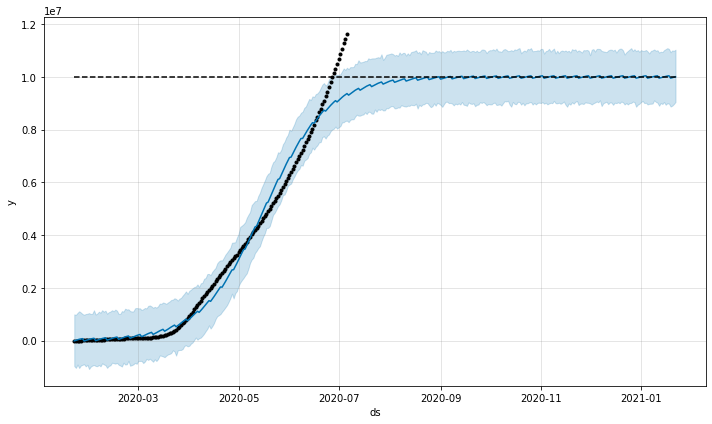

In [ ]:
fig = m.plot(forecast)

In [ ]:
#help(Prophet)

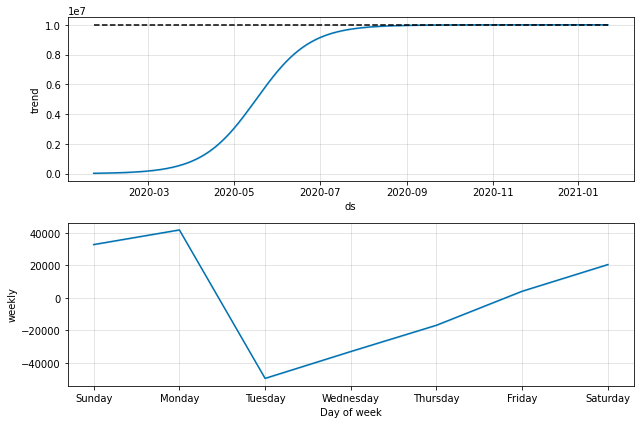

In [ ]:
fig1=m.plot_components(forecast)

#### Worldwide - Deaths

In [ ]:
#fixing data
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
deaths['cap']= 10000000
deaths.head()

ds     y       cap
0 2020-01-22  17.0  10000000
1 2020-01-23  18.0  10000000
2 2020-01-24  26.0  10000000
3 2020-01-25  42.0  10000000
4 2020-01-26  56.0  10000000

In [ ]:
m1 = Prophet(interval_width=0.95,growth = 'logistic',n_changepoints=5)
m1.fit(deaths)
future = m1.make_future_dataframe(periods=200)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
362 2021-01-18
363 2021-01-19
364 2021-01-20
365 2021-01-21
366 2021-01-22

In [ ]:
future['cap']=10000000
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
362 2021-01-18  3.547548e+06  23863.974665  9.917568e+06
363 2021-01-19  3.574551e+06  25813.252759  9.927955e+06
364 2021-01-20  3.601211e+06  24018.674017  9.933236e+06
365 2021-01-21  3.627998e+06  22402.010137  9.938220e+06
366 2021-01-22  3.654920e+06  27792.522160  9.947624e+06

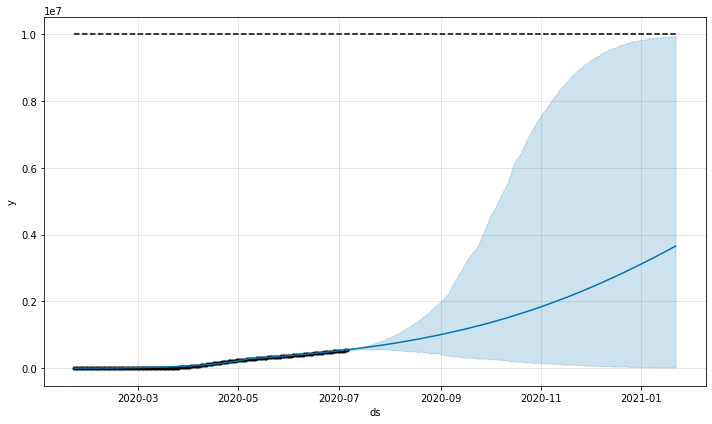

In [ ]:
fig = m1.plot(forecast)

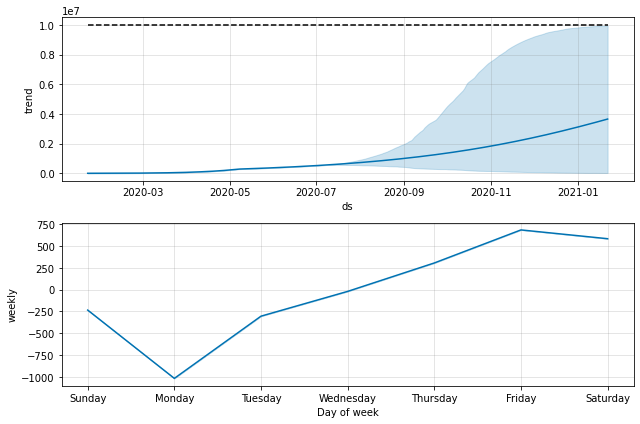

In [ ]:
fig1=m1.plot_components(forecast)

#### Worldwide - Recovery

In [ ]:
#fixing data
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
recovered['cap']= 10000000
recovered.head()

ds     y       cap
0 2020-01-22  28.0  10000000
1 2020-01-23  30.0  10000000
2 2020-01-24  36.0  10000000
3 2020-01-25  39.0  10000000
4 2020-01-26  52.0  10000000

In [ ]:
m2 = Prophet(interval_width=0.95,growth = 'logistic',n_changepoints=5)
m2.fit(recovered)
future = m2.make_future_dataframe(periods=200)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
362 2021-01-18
363 2021-01-19
364 2021-01-20
365 2021-01-21
366 2021-01-22

In [ ]:
future['cap']=10000000
forecast = m2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
362 2021-01-18  1.000128e+07  9.858992e+06  1.014233e+07
363 2021-01-19  9.987071e+06  9.845864e+06  1.013472e+07
364 2021-01-20  9.994414e+06  9.846079e+06  1.013690e+07
365 2021-01-21  9.995218e+06  9.863696e+06  1.013978e+07
366 2021-01-22  1.000016e+07  9.861006e+06  1.014843e+07

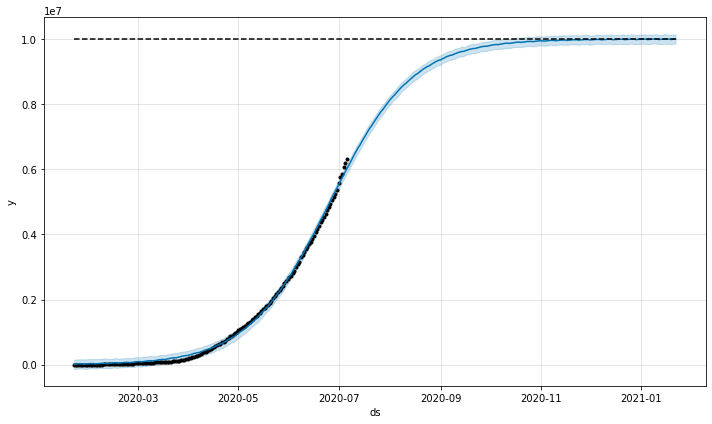

In [ ]:
fig = m2.plot(forecast)

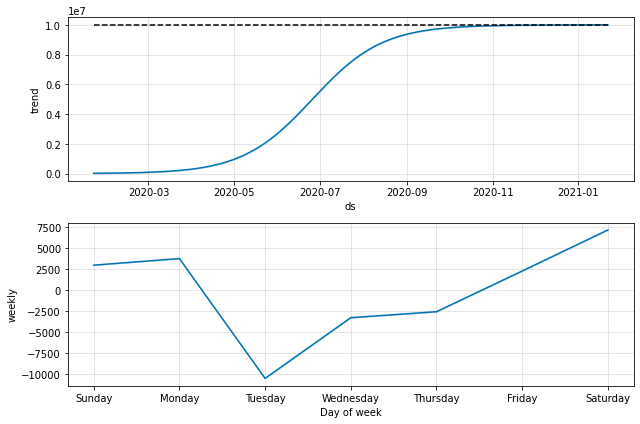

In [ ]:
fig1=m2.plot_components(forecast)

# Evaluation

Confirmed Cases

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m,initial='20 days', period='25 days', horizon = '50 days')
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-03-03 00:00:00 and 2020-05-17 00:00:00


ds          yhat    yhat_lower    yhat_upper             y     cutoff
0 2020-03-04 114243.442674  88788.693821 139138.546598  95124.000000 2020-03-03
1 2020-03-05 121513.439720  97124.033718 143748.024688  97886.000000 2020-03-03
2 2020-03-06 127562.113579 104529.352303 150457.384703 101800.000000 2020-03-03
3 2020-03-07 133294.125802 108497.987768 158573.810565 105836.000000 2020-03-03
4 2020-03-08 139587.460685 117937.440067 162661.625941 109835.000000 2020-03-03

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon                 mse          rmse  ...     mape    mdape  coverage
0  5 days  76270430732.437042 276171.017184  ... 0.142429 0.123385  0.100000
1  6 days  88857375623.567108 298089.542962  ... 0.151331 0.134294  0.050000
2  7 days 103918695824.292633 322364.228512  ... 0.158994 0.142651  0.000000
3  8 days 124648010628.968613 353055.251524  ... 0.165124 0.145365  0.000000
4  9 days 147352513715.958527 383865.228584  ... 0.172167 0.146789  0.000000

[5 rows x 7 columns]

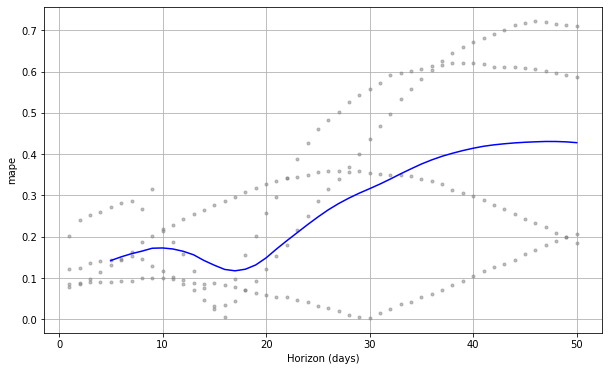

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

Deaths

In [ ]:
df_cv = cross_validation(m1, initial='20 days', period='25 days', horizon = '50 days')
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-03-03 00:00:00 and 2020-05-17 00:00:00


ds        yhat  yhat_lower  yhat_upper           y     cutoff
0 2020-03-04 3953.462036 3458.435071 4541.831407 3254.000000 2020-03-03
1 2020-03-05 4211.805096 3647.077302 4796.442889 3348.000000 2020-03-03
2 2020-03-06 4450.189725 3855.471596 5024.865530 3460.000000 2020-03-03
3 2020-03-07 4736.081998 4194.570483 5339.907309 3558.000000 2020-03-03
4 2020-03-08 5003.487069 4413.187768 5566.101303 3803.000000 2020-03-03

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

horizon               mse         rmse  ...     mape    mdape  coverage
0  5 days 2899339371.895512 53845.513944  ... 0.210633 0.249487  0.200000
1  6 days 3789408701.800216 61558.173314  ... 0.238834 0.281462  0.200000
2  7 days 4850408801.040817 69644.876345  ... 0.264578 0.312779  0.250000
3  8 days 6291479320.276648 79318.845934  ... 0.292873 0.323960  0.250000
4  9 days 8047605394.850147 89708.446619  ... 0.324386 0.340640  0.200000

[5 rows x 7 columns]

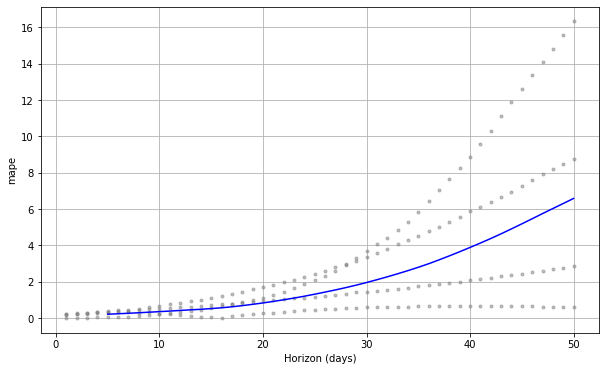

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

Recovery

In [ ]:
df_cv = cross_validation(m2, initial='20 days', period='25 days', horizon = '50 days')
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-03-03 00:00:00 and 2020-05-17 00:00:00


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2020-03-04 58208.219330 54610.391264 62117.270414 51171.000000 2020-03-03
1 2020-03-05 64395.513391 60804.854465 68162.053370 53797.000000 2020-03-03
2 2020-03-06 71120.804016 67725.766136 74747.378860 55866.000000 2020-03-03
3 2020-03-07 78856.970637 75181.860223 82463.446451 58359.000000 2020-03-03
4 2020-03-08 86682.220743 83313.456294 90423.233738 60695.000000 2020-03-03

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

horizon               mse         rmse  ...     mape    mdape  coverage
0  5 days 1714462575.904669 41406.069312  ... 0.116388 0.083581  0.150000
1  6 days 2397822931.093606 48967.570198  ... 0.145928 0.100399  0.150000
2  7 days 3405510176.127206 58356.749191  ... 0.178170 0.126301  0.150000
3  8 days 4692945020.422714 68505.072954  ... 0.210444 0.147140  0.200000
4  9 days 6538671523.789463 80862.052434  ... 0.246262 0.165357  0.250000

[5 rows x 7 columns]

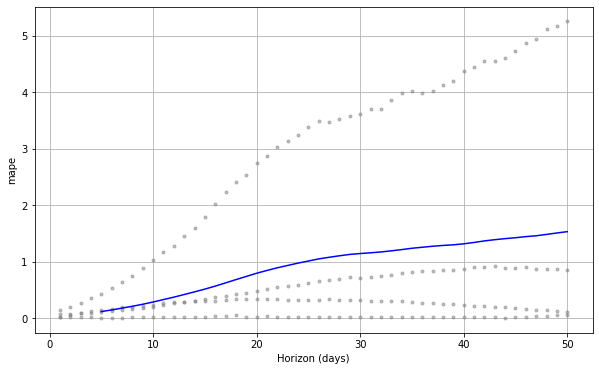

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

# Clustering

In [ ]:
temp1 =df.groupby('Country')['Confirmed','Deaths','Recovered'].sum().reset_index()
temp = temp1.set_index(['Country'])
temp.head()

Confirmed       Deaths     Recovered
Country                                                  
 Azerbaijan           1.000000     0.000000      0.000000
('St. Martin',)       2.000000     0.000000      0.000000
Afghanistan     1199996.000000 25778.000000 319506.000000
Albania          114287.000000  3450.000000  72308.000000
Algeria          715382.000000 55664.000000 433640.000000

In [ ]:
from scipy.cluster.hierarchy import dendrogram , linkage
z = linkage(temp,'ward')

In [ ]:
import plotly.figure_factory as ff
names = df['Country']
fig = ff.create_dendrogram(z,labels = temp.index,color_threshold=240)
fig.update_layout(width=2500, height=800)
fig.show()